In [1]:
!pip install xgboost

In [2]:
#Data Processing
import pandas as pd

#linear algebra
import numpy as np

#dat visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

#algorithms
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

#from xgboost import XGBRegressor 
from sklearn import metrics

In [3]:
bigdata_train = pd.read_csv('bigdatamart_train.csv')

In [4]:
bigdata_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#statistical information
bigdata_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
#check unique values in dataset

bigdata_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Preprocessing the dataset


In [7]:
#checking for the null values
bigdata_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#check for categorical attribute

cat_col = []
for x in bigdata_train.dtypes.index:
    if bigdata_train.dtypes[x] =='object':
        cat_col.append(x)
cat_col
    

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
#print the categorical columns

for col in cat_col:
    print(col)
    print(bigdata_train[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [11]:
#fill the missing values

item_weight_mean = bigdata_train.pivot_table(values='Item_Weight', index ='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
miss_bool =bigdata_train['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [13]:
for i, item in enumerate(bigdata_train['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            bigdata_train['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            bigdata_train['Item_Weight'][i] =0
            

In [14]:
bigdata_train['Item_Weight'].isnull().sum()

0

In [15]:
outlet_size_mode =bigdata_train.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
miss_bool = bigdata_train['Outlet_Size'].isnull()
bigdata_train.loc[miss_bool, 'Outlet_Size'] = bigdata_train.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [17]:
bigdata_train['Outlet_Size'].isnull().sum()

0

In [18]:
sum(bigdata_train['Item_Visibility']==0)

526

In [19]:
bigdata_train.loc[:, 'Item_Visibility'].replace([0],[bigdata_train['Item_Visibility'].mean()], inplace=True)

In [20]:
sum(bigdata_train['Item_Visibility']==0)

0

In [21]:
#combine item at fat content

bigdata_train['Item_Fat_Content'] = bigdata_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
bigdata_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Creation of New attributes from the available attribute


In [22]:
bigdata_train['New_Item_Type'] =bigdata_train['Item_Identifier'].apply(lambda x: x[:2])
bigdata_train['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [23]:
bigdata_train['New_Item_Type'] = bigdata_train['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
bigdata_train['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [24]:
bigdata_train.loc[bigdata_train['New_Item_Type']=='Non-Consumable','Item_Fat_Content']= 'Non-Edible'
bigdata_train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [25]:
#create small values for establishment year

bigdata_train['Outlet_Years'] = 2013 - bigdata_train['Outlet_Establishment_Year']

In [26]:
bigdata_train['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [27]:
bigdata_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# Exploratory Data Analysis

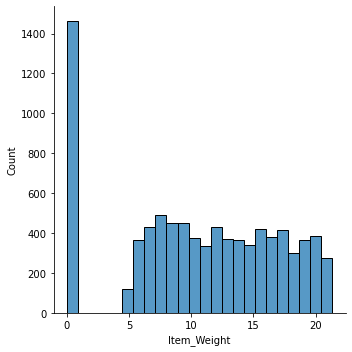

In [28]:
sns.displot(bigdata_train['Item_Weight'])

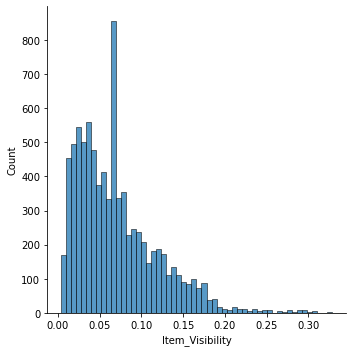

In [29]:
sns.displot(bigdata_train['Item_Visibility'])

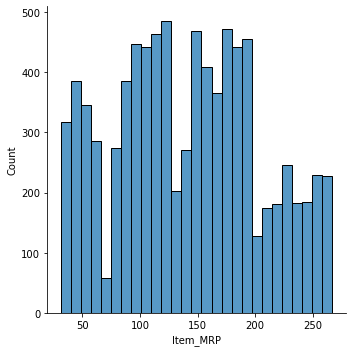

In [30]:
sns.displot(bigdata_train['Item_MRP'])

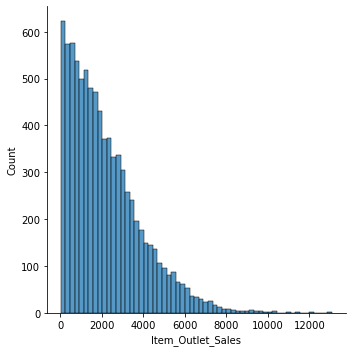

In [31]:
sns.displot(bigdata_train['Item_Outlet_Sales'])

In [32]:
#Log transformation

bigdata_train['Item_Outlet_Sales'] = np.log(1+bigdata_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

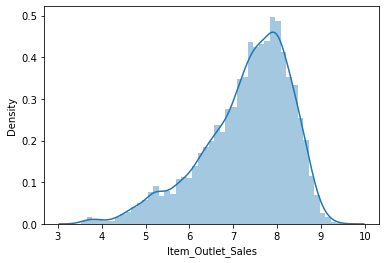

In [33]:
sns.distplot(bigdata_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

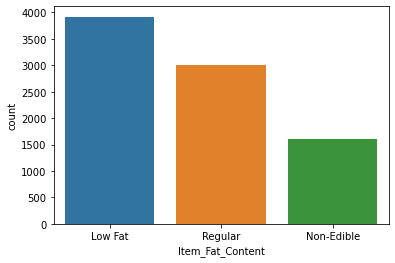

In [34]:
sns.countplot(bigdata_train['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

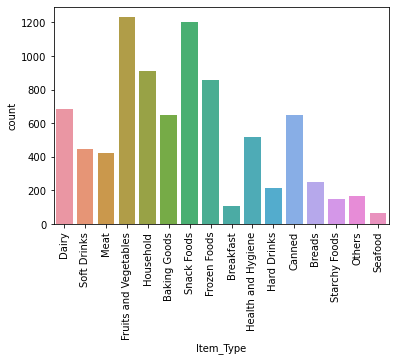

In [35]:
l=list(bigdata_train['Item_Type'].unique())
chart =sns.countplot(bigdata_train['Item_Type'])
chart.set_xticklabels(labels=l,rotation=90)


sns.countplot(bigdata_train['Item_Type'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

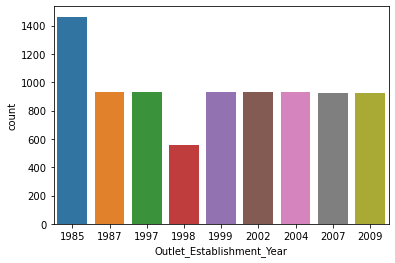

In [36]:
sns.countplot(bigdata_train['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

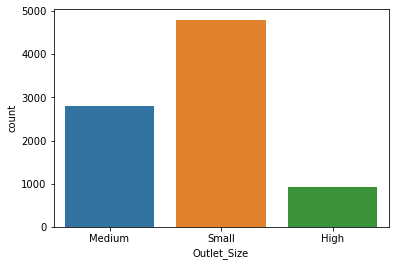

In [37]:
sns.countplot(bigdata_train['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

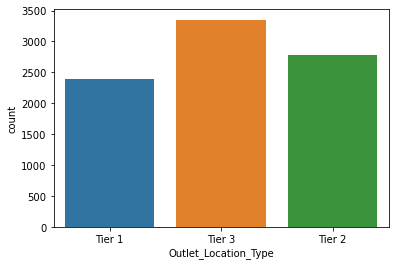

In [38]:
sns.countplot(bigdata_train['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

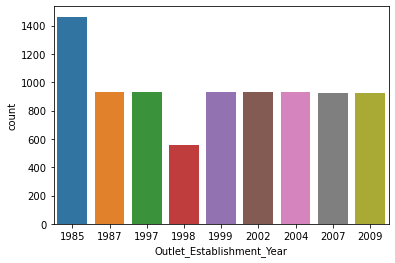

In [39]:
sns.countplot(bigdata_train['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

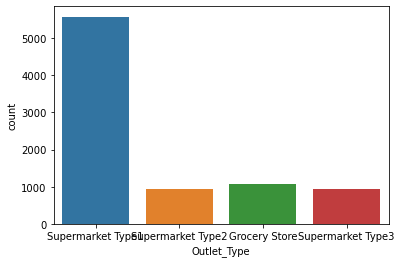

In [40]:
sns.countplot(bigdata_train['Outlet_Type'])

# Coorelation Matrix

<AxesSubplot:>

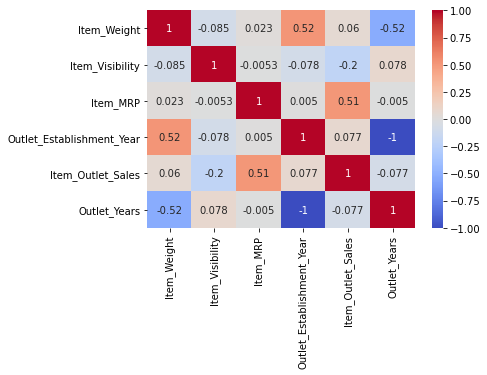

In [41]:
corr = bigdata_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
bigdata_train['Outlet'] = le.fit_transform(bigdata_train['Outlet_Identifier'])
cat_col =['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type', 'New_Item_Type']
for col in cat_col:
    bigdata_train[col] = le.fit_transform(bigdata_train[col])

# OneHot  Encoding

In [43]:
bigdata_train = pd.get_dummies(bigdata_train,columns =['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type', 'New_Item_Type'])

bigdata_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,8.225808,14,9,1,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,6.096776,4,3,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,7.648868,14,9,1,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,182.0950,OUT010,1998,6.597664,15,0,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,53.8614,OUT013,1987,6.903451,26,1,0,...,0,0,1,0,1,0,0,0,0,1


# Input Split

In [44]:
X = bigdata_train.drop(columns =['Outlet_Establishment_Year', 'Item_Identifier','Outlet_Identifier',"Item_Outlet_Sales"])
y =bigdata_train['Item_Outlet_Sales']

# Model Training

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X,y):
    #train the model
    model.fit(X,y)
    
    #predict the training set
    pred = model.predict(X)
    
    #perform cross-validation
    cv_score = cross_val_score(model, X,y, scoring ='neg_mean_squared_error')
    #average values
    
    cv_score =np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV score:", cv_score)
          

Model Report
MSE: 0.2881595499686696
CV score: 0.29738456872051156


<AxesSubplot:title={'center':'Model Coefficients'}>

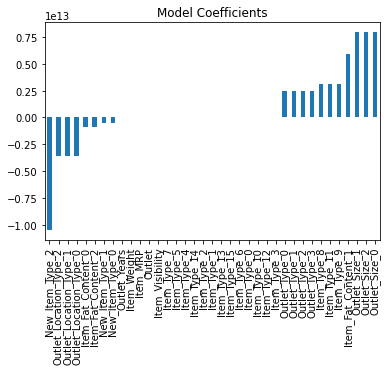

In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

model = LinearRegression(normalize =True)
train(model, X,y)
coef= pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

from the above we can find the mean square error is MSE: 0.2881595499686696 and the cv score is CV score: 0.29738456872051156
which is little higher than MSE


# let us check for Ridge regression

Model Report
MSE: 0.4277026772104657
CV score: 0.4293509054170167


<AxesSubplot:title={'center':'Model Coefficients'}>

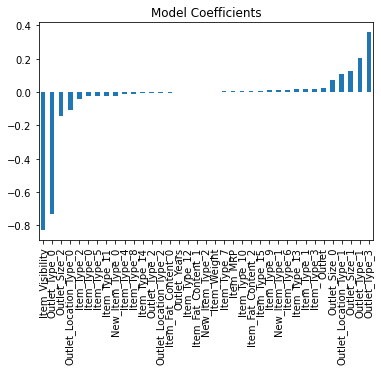

In [51]:
model = Ridge(normalize =True)
train(model, X,y)
coef= pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

from the above we can find that error is slightly highere than Linear Regression

# let us do it for Lasso

Model Report
MSE: 0.7628688679102086
CV score: 0.7630789166281843


<AxesSubplot:title={'center':'Model Coefficients'}>

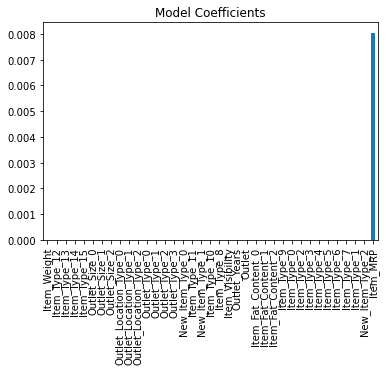

In [53]:
model = Lasso()
train(model, X,y)
coef= pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

here it is taking Item_mrp has coefficient

# DecisionTreeRegressor

Model Report
MSE: 3.470876914911175e-34
CV score: 0.573921915851157


<AxesSubplot:title={'center':'Feature Importance'}>

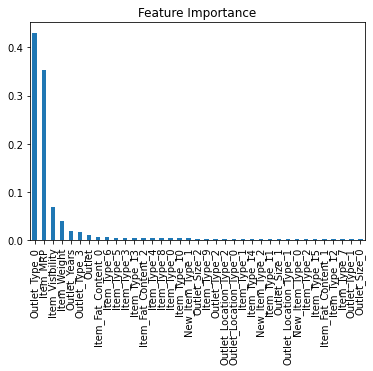

In [56]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')


here the MSE is very less  but, CV is 0.5 , not performing well

# RandomForestRegressor

Model Report
MSE: 0.042258575882170184
CV score: 0.30980792171554267


<AxesSubplot:title={'center':'Feature Importance'}>

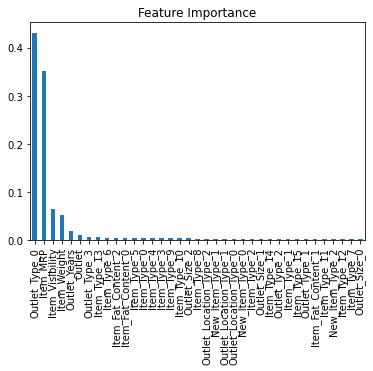

In [57]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

here the MSE and CV score is better compared to DecisionTree 

Model Report
MSE: 1.0418489584965893e-28
CV score: 0.34461789375061036


<AxesSubplot:title={'center':'Feature Importance'}>

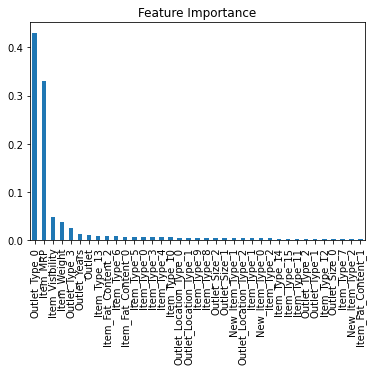

In [58]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

from the above models Linear Regression is the better